## DOTA数据集分析框架
### 1. 计算数据集的总体RGB均值
### 2. 分析宽高分布
### 3. 统计宽高比

In [23]:
"""
加载依赖项
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import pylab
import sys
# sys.path.append('/home/raymond/project/PytorchSSD_DOTA/data/DOTA_devkit') # 保证DOTA_devkit可用的关键
from DOTA_devkit import DOTA
import torchvision.transforms as transforms
from PIL import Image
import cv2

### 参数设置

In [32]:
subset_name = 'train'
parseLabel='parse_dota_rec'
specific_class = ['soccer-ball-field','tennis-court','basketball-court', 'swimming-pool','baseball-diamond']

### 计算数据集的RGB均值

In [25]:
"""
计算数据集的RGB均值
"""
import os
import numpy as np
import cv2
 
ims_path='/home/buaab622/data/DOTA/'+subset_name+'/images'# 图像数据集的路径
ims_list=os.listdir(ims_path)
R_means=[]
G_means=[]
B_means=[]
for im_list in ims_list:
    filepath = ims_path+'/'+im_list
    if os.path.splitext(filepath)[-1] != '.png':
        continue
    im=cv2.imread(ims_path+'/'+im_list)
#extrect value of diffient channel
    im_R=im[:,:,0]
    im_G=im[:,:,1]
    im_B=im[:,:,2]
#count mean for every channel
    im_R_mean=np.mean(im_R)
    im_G_mean=np.mean(im_G)
    im_B_mean=np.mean(im_B)
#save single mean value to a set of means
    R_means.append(im_R_mean)
    G_means.append(im_G_mean)
    B_means.append(im_B_mean)
    #print('图片：{} 的 RGB平均值为 \n[{}，{}，{}]'.format(im_list,im_R_mean,im_G_mean,im_B_mean) )
#three sets  into a large set
a=[R_means,G_means,B_means]
mean=[0,0,0]
#count the sum of different channel means
mean[0]=np.mean(a[0])
mean[1]=np.mean(a[1])
mean[2]=np.mean(a[2])
print('数据集的BGR平均值为\n[{}，{}，{}]'.format( mean[0],mean[1],mean[2]) )
#cv.imread()读取Img时候将rgb转换为了bgr

KeyboardInterrupt: 

### 分析宽高分布

 Error: /home/buaab622/data/DOTA/train/labelTxt/Train_Task2_gt.zip is not a .txt file
 Error: /home/buaab622/data/DOTA/train/labelTxt/labelTxt.zip is not a .txt file
 DOTA dataset has been successfully loaded 
加载图片ID完成：共有 514 张图片符合筛选条件
514
all bounding boxes have been loaded
min_w =  7.0
max_w =  1151.0
min_h =  6.0
max_h =  1093.0


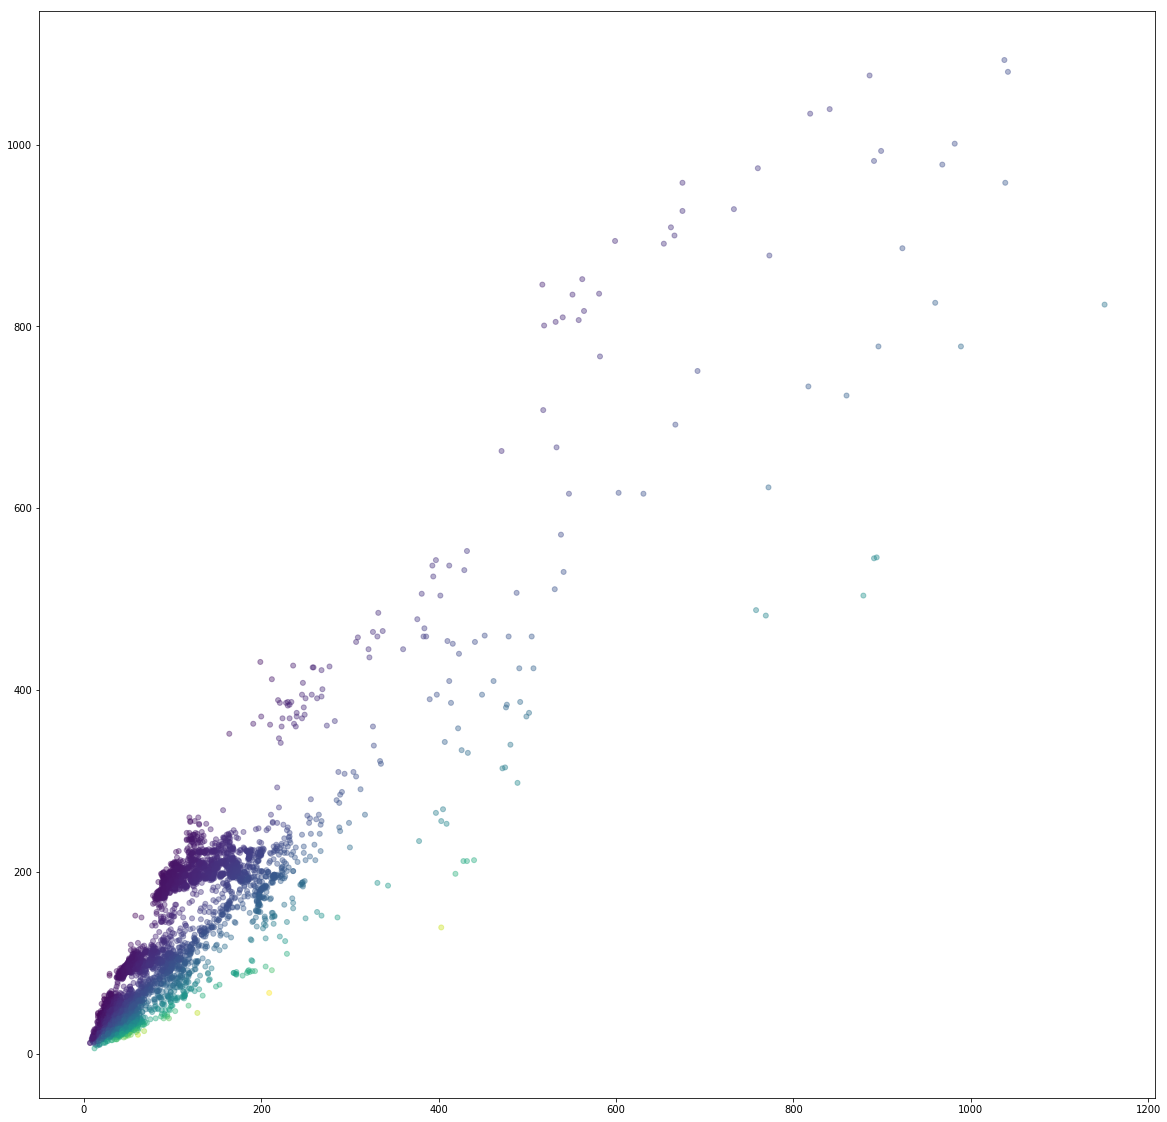

In [33]:
dataset = DOTA.DOTA('/home/buaab622/data/DOTA/'+subset_name,parseMode=parseLabel)
#dataset = DOTA.DOTA('/media/raymond/MainDrive/Dataset/DOTA/train_test',parseMode = 'parse_dota_rec')
#DOTA_CLASSES = ('__background__', 'ship','small-vehicle')
temp = ['__background__']
temp.extend(specific_class)
DOTA_CLASSES = tuple(temp)
class_to_ind =dict(zip(DOTA_CLASSES, range(len(DOTA_CLASSES))))
"""
加载包含指定类别目标的图片ID
"""
imgids = dataset.getImgIds(catNms=specific_class)
print(len(imgids))
res = np.empty((0, 4))
for imgid in imgids:
    img = dataset.loadImgs(imgid)[0]
    anns = dataset.loadAnns(imgId=imgid,catNms=specific_class)
    labels = []
    # 解析DOTA.loadAnns返回的Anns
    for num,ann in enumerate(anns):
        labels.append([])
        xmin,ymin,xmax,ymax = list(ann['bndbox'])
        w = xmax - xmin
        h = ymax - ymin
        w_h = w/h
        labels[num].extend([w,h,w_h])
        labels[num].append(class_to_ind[ann['name']])
    res = np.vstack((res, labels))  # [xmin, ymin, xmax, ymax, label_ind]
print("all bounding boxes have been loaded")
#print(res[:,0])
# 可视化
plt.figure()

pylab.rcParams['figure.figsize'] = (20.0, 20.0) # 调整显示图像大小
#rand 均匀分布和 randn高斯分布
print("min_w = ",np.min(res[:,0]))
print("max_w = ",np.max(res[:,0]))
print("min_h = ",np.min(res[:,1]))
print("max_h = ",np.max(res[:,1]))
x=res[:,0]
y=res[:,1]
#T=np.arctan2(x,y)
T=np.divide(x,y)
plt.scatter(x,y,c=T,s=25,alpha=0.4,marker='o')
#T:散点的颜色
#s：散点的大小
#alpha:是透明程度
plt.show()

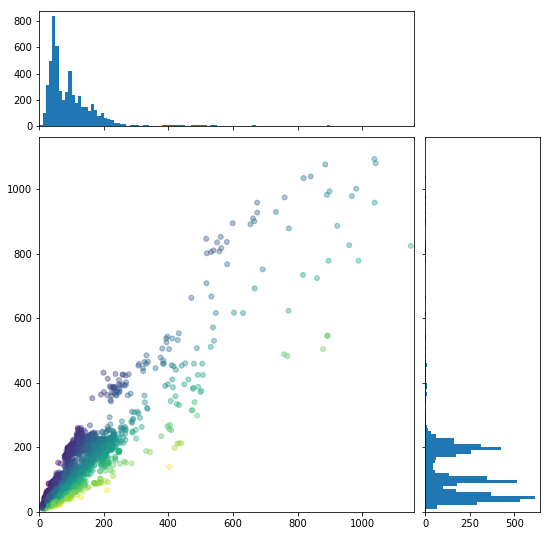

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

# Fixing random state for reproducibility
np.random.seed(19680801)


# the random data
x=res[:,0]
y=res[:,1]

nullfmt = NullFormatter()         # no labels

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# set scatter color
T=np.arctan2(x,y)
# the scatter plot:
axScatter.scatter(x, y, c =T,s=25,alpha=0.4,marker='o')

# now determine nice limits by hand:
binwidth = 10
xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
lim = (int(xymax/binwidth) + 1) * binwidth

axScatter.set_xlim((0, lim))
axScatter.set_ylim((0, lim))

bins = np.arange(0, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)
axHisty.hist(y, bins=bins, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

(5359,)
3.1194029850746268
[0.32954545 0.35744403 0.38534261 0.41324118 0.44113976 0.46903833
 0.49693691 0.52483548 0.55273406 0.58063263 0.60853121 0.63642978
 0.66432836 0.69222693 0.72012551 0.74802408 0.77592266 0.80382123
 0.83171981 0.85961839 0.88751696 0.91541554 0.94331411 0.97121269
 0.99911126 1.02700984 1.05490841 1.08280699 1.11070556 1.13860414
 1.16650271 1.19440129 1.22229986 1.25019844 1.27809701 1.30599559
 1.33389417 1.36179274 1.38969132 1.41758989 1.44548847 1.47338704
 1.50128562 1.52918419 1.55708277 1.58498134 1.61287992 1.64077849
 1.66867707 1.69657564 1.72447422 1.7523728  1.78027137 1.80816995
 1.83606852 1.8639671  1.89186567 1.91976425 1.94766282 1.9755614
 2.00345997 2.03135855 2.05925712 2.0871557  2.11505427 2.14295285
 2.17085142 2.19875    2.22664858 2.25454715 2.28244573 2.3103443
 2.33824288 2.36614145 2.39404003 2.4219386  2.44983718 2.47773575
 2.50563433 2.5335329  2.56143148 2.58933005 2.61722863 2.6451272
 2.67302578 2.70092436 2.72882293 2.75

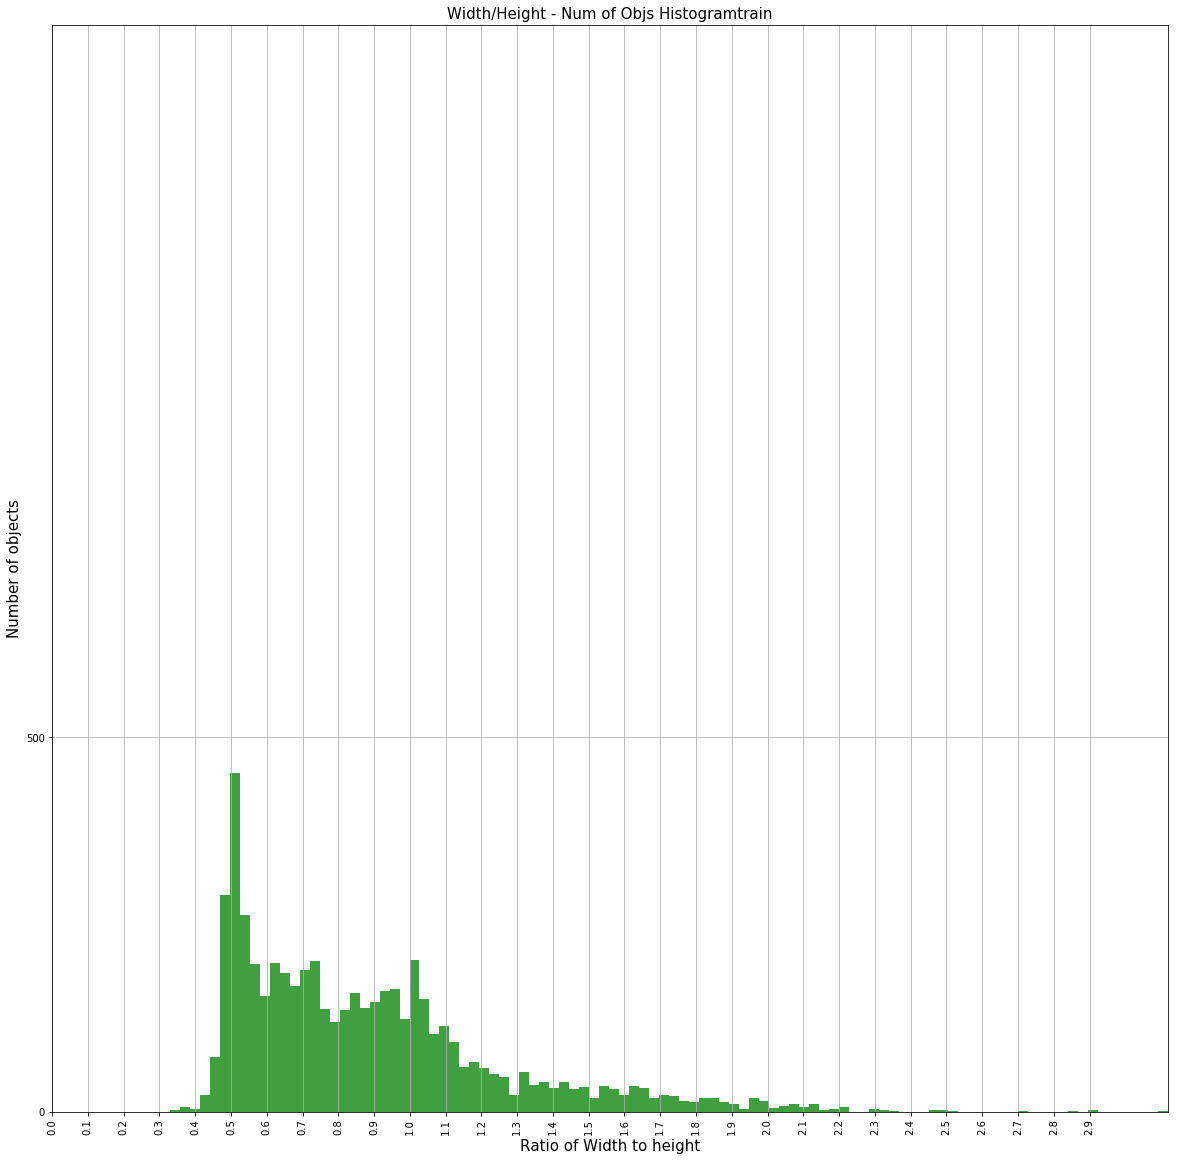

In [35]:
# coding:utf-8
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.pyplot import savefig
from pylab import *
pylab.rcParams['figure.figsize'] = (20.0, 20.0) # 调整显示图像大小
# Fixing random state for reproducibility
np.random.seed(19680801)
x = np.divide(res[:,0],res[:,1])
print(x.shape)
print(max(x))
# the histogram of the data
n, bins, patches = plt.hist(x, 100, density=False, facecolor='g', alpha=0.75)
print(bins)
plt.xlabel('Ratio of Width to height',size =15)
plt.ylabel('Number of objects',size =15)
plt.title('Width/Height - Num of Objs Histogram'+subset_name,size =15)
plt.axis([0, max(x), 0, max(n)+1000])

tempx = int(int(max(x))/0.1)
tempy = int(int(max(n)+1000)/500)
plt.xticks([x*0.1 for x in range(tempx)],rotation=90,size=10)
plt.yticks([x*500 for x in range(tempy)],size=10)
plt.grid(True)
savefig("Width-Height-NumofObjs-Histogram-"+subset_name+".jpg")
plt.show()